<a href="https://colab.research.google.com/github/luiscardon/TCC-2023/blob/main/TweenAxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Varios ejes "y" con un eje "x" comun.

El siguiente ejemplo muestra como como dibujar varios ejes y a la derecha del dibujo con diferentes escalas, con un único eje común. Ejemplo tomado de la siguiente URL:



https://stackoverflow.com/questions/48618992/matplotlib-graph-with-more-than-2-y-axes



Spine: línea que marca el fin del área de ploteo y de donde parten los ticks y subticks que definen la escala de los datos. Se puede hacer múltiples spines, visibles o invisibles y con posiciones distintas.

https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html


Twinx: Crea nuevos ejes con un eje x invisible y un eje y independiente colocado opuesto al original (es decir, a la derecha). La configuración de escala automática del eje x se heredará de los ejes originales.

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html

pyplot.subpplots:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html



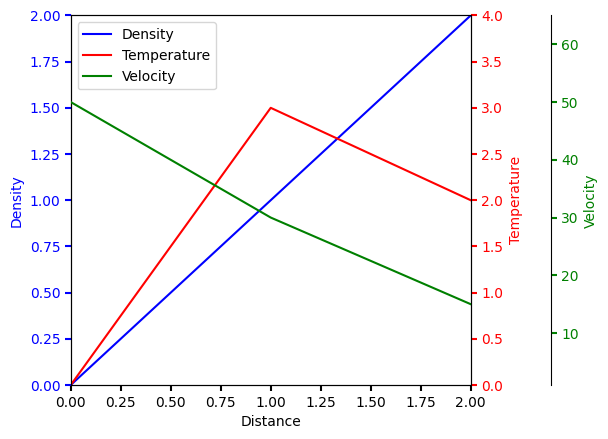

In [1]:
import matplotlib.pyplot as plt

"""
https://stackoverflow.com/questions/48618992/matplotlib-graph-with-more-than-2-y-axes
"""
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# Aquí pyplot.subplots define la figura como fig y los ejes de la figura como hosts.
# La figura es única, pero es posible agregar elentos a la figura
# adicionandolos a los ejes, axes, en es código denominado host
fig, host = plt.subplots()
# Ajusta los parámetros de la figura
# right: The position of the right edge of the subplots, as a fraction of the figure width.
# Ajusta el ancho de la figura.
fig.subplots_adjust(right=0.75)

# Crea dos ejes derechos
par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
# Desplazamiento a la derecha del segundo eje vertical. Pruebe con 1.5
# para ver el efecto
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
# No veo la diferencia (la necesidada) en el uso de las siguinte funcion.
make_patch_spines_invisible(par2)

# Second, show the right spine.
# Visibiliza el segundo spine (el eje y)
par2.spines["right"].set_visible(True)

#Crea las tres curvas que iran a la figura 1
#Plot returna una tuple con uno o mas elementos a dibujar.
#la coma es necesaria para desempaquetar la tuple.
# plotea las tres curvas, además crea los objetos para cada
# cada una, esto facilita obtener su propiedades como color, etc.
# usadas más adelante.
p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

# Limites y leyendas autoexplicativo
host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

# Leyenda de los ejes usuales, x e y
host.set_xlabel("Distance")
host.set_ylabel("Density")
# Leyendas de los ejes y gemelos
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

# Toma el color definido para cada una de las curvas
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

#crea un diccionario con los parametros necesarios...
# por tick_params
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

#Toma  las etiquetas de las tres curvas definidas en su creación,
# para hacer el recuadro con las leyendas
host.legend(lines, [l.get_label() for l in lines])



plt.show()